<a href="https://colab.research.google.com/github/NonnyN/Employee-Retention-Analysis/blob/main/EmployeeRetention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Employee Retention Analysis

Complete analysis including EDA, visualization, and logistic regression modeling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
!find /content/drive/MyDrive/ -iname '*HRdata*'

/content/drive/MyDrive/HRdata.csv


In [10]:
df = pd.read_csv('/content/drive/MyDrive/HRdata.csv')

In [11]:
# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset Shape: (14999, 10)

First few rows:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [12]:
# Dataset information
print("Dataset Info:")
df.info()

print("\n" + "="*50)
print("Statistical Summary:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB

Statistical Summary:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [14]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


In [15]:
# Check class distribution
print("\n" + "="*50)
print("Employee Retention Distribution:")
print(df['left'].value_counts())
print("\nPercentage:")
print(df['left'].value_counts(normalize=True) * 100)


Employee Retention Distribution:
left
0    11428
1     3571
Name: count, dtype: int64

Percentage:
left
0    76.191746
1    23.808254
Name: proportion, dtype: float64


Task 1: Exploratory Data Analysis

Identify variables with impact on Employee Retension

In [16]:
#Correlation analysis for numerical variables
print("Correlation with 'left' (Employee Retention):")
print("="*50)

Correlation with 'left' (Employee Retention):


In [17]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
correlation_with_left = df[numerical_cols].corr()['left'].sort_values(ascending=False)
print(correlation_with_left)

left                     1.000000
time_spend_company       0.144822
average_montly_hours     0.071287
number_project           0.023787
last_evaluation          0.006567
promotion_last_5years   -0.061788
Work_accident           -0.154622
satisfaction_level      -0.388375
Name: left, dtype: float64


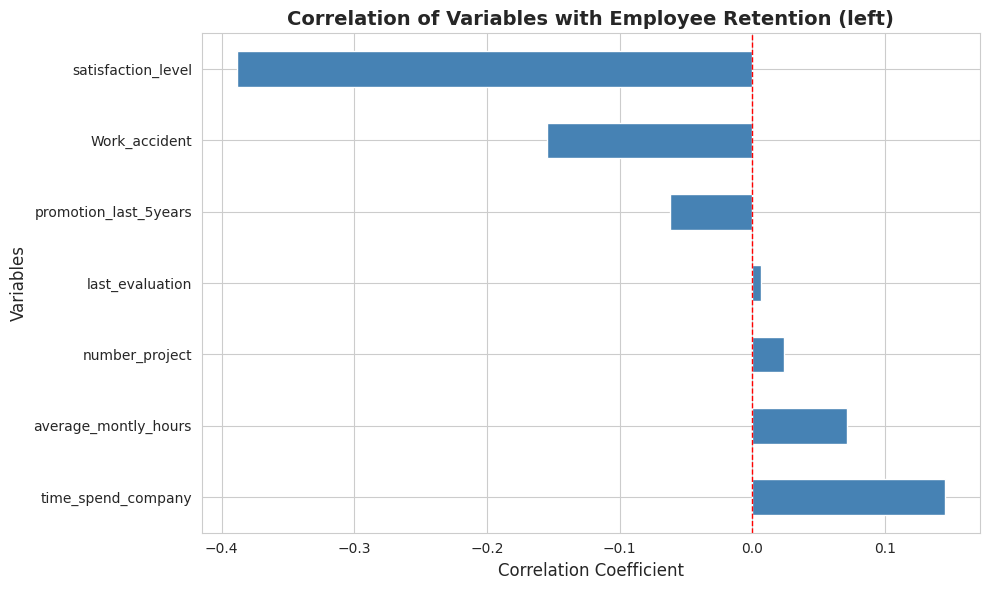

In [18]:
# Visualize correlation
plt.figure(figsize=(10, 6))
correlation_with_left.drop('left').plot(kind='barh', color='steelblue')
plt.title('Correlation of Variables with Employee Retention (left)', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

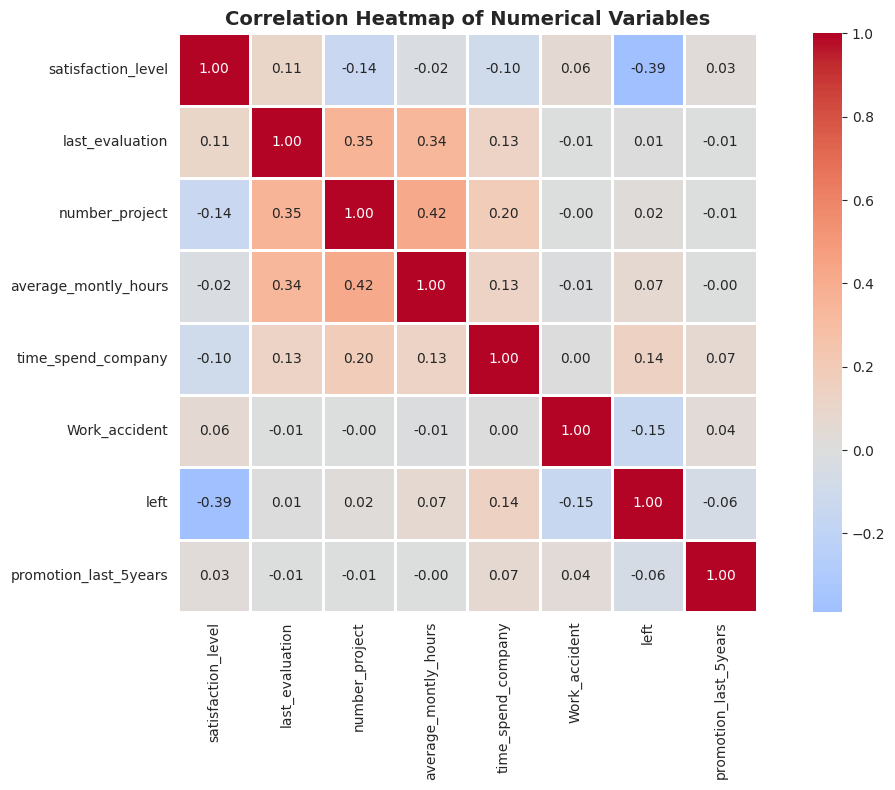

In [19]:
# Create a comprehensive correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', linewidths=1, square=True)
plt.title('Correlation Heatmap of Numerical Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

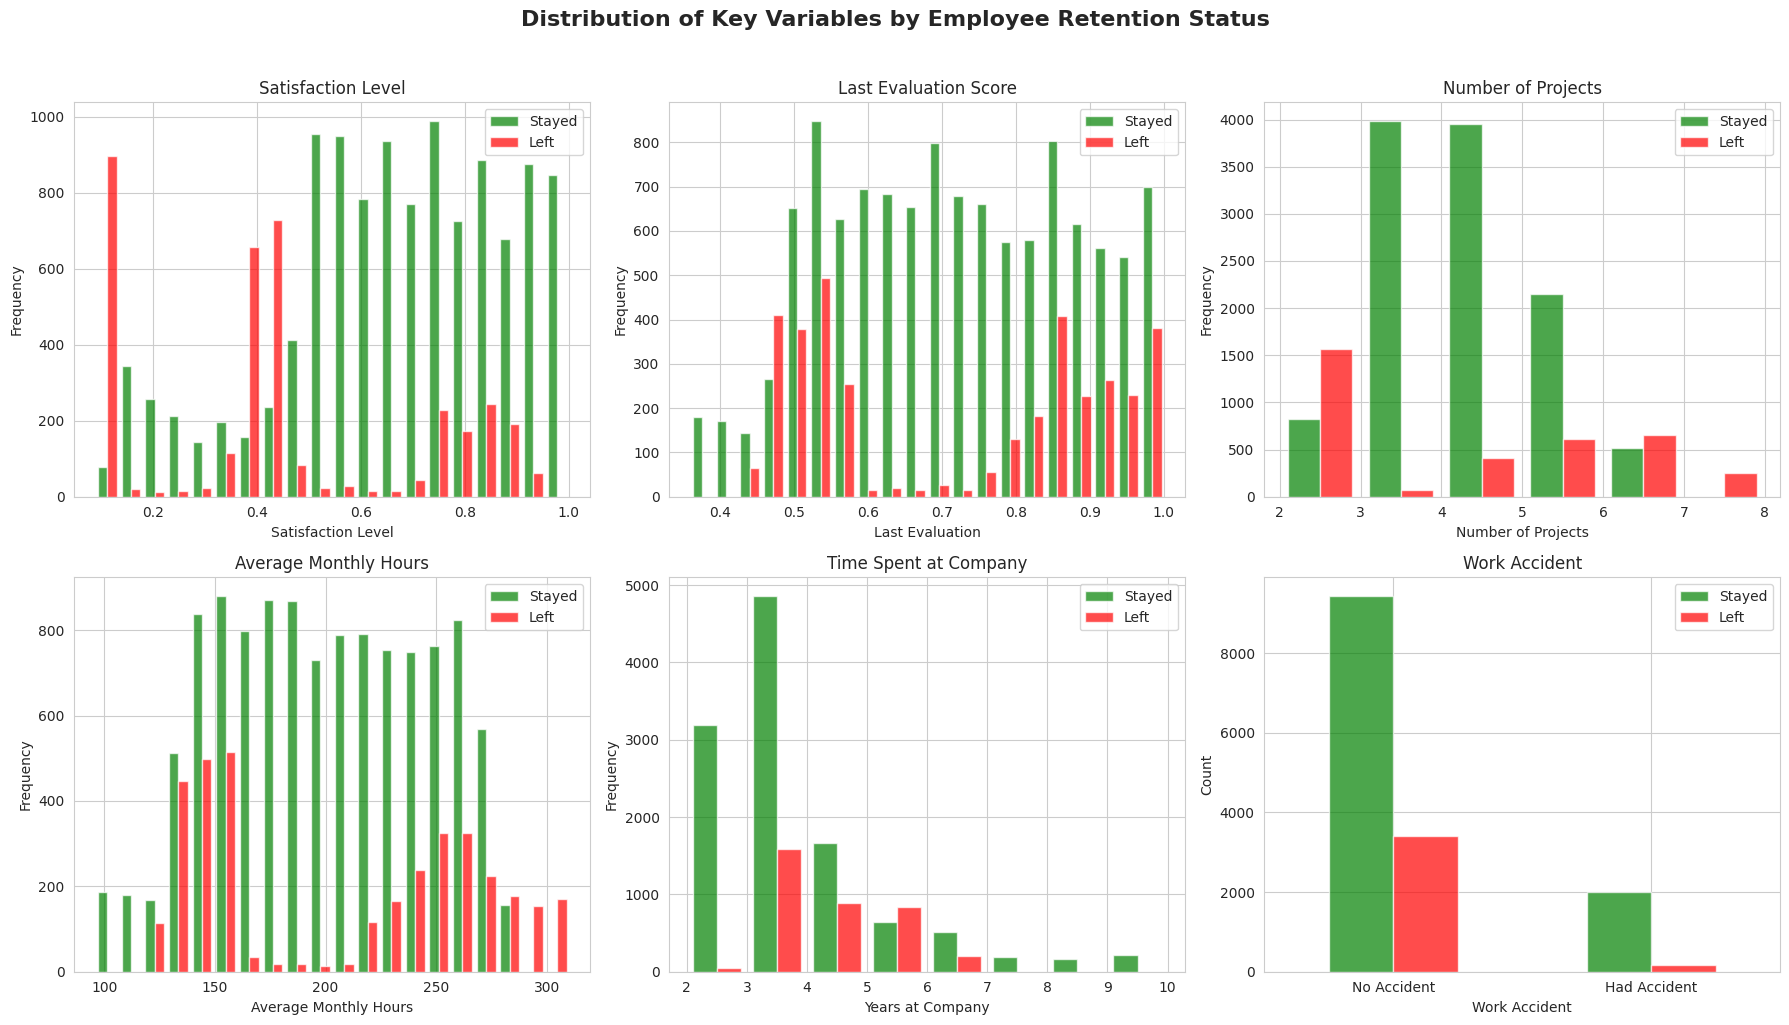

In [29]:
# Distribution of key variables by retention status
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution of Key Variables by Employee Retention Status', fontsize=16, fontweight='bold', y=1.02)

# Satisfaction Level
axes[0, 0].hist([df[df['left']==0]['satisfaction_level'], df[df['left']==1]['satisfaction_level']],
                bins=20, label=['Stayed', 'Left'], alpha=0.7, color=['green', 'red'])
axes[0, 0].set_xlabel('Satisfaction Level')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Satisfaction Level')
axes[0, 0].legend()

# Last Evaluation
axes[0, 1].hist([df[df['left']==0]['last_evaluation'], df[df['left']==1]['last_evaluation']],
                bins=20, label=['Stayed', 'Left'], alpha=0.7, color=['green', 'red'])
axes[0, 1].set_xlabel('Last Evaluation')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Last Evaluation Score')
axes[0, 1].legend()

# Number of Projects
axes[0, 2].hist([df[df['left']==0]['number_project'], df[df['left']==1]['number_project']],
                bins=range(2, 9), label=['Stayed', 'Left'], alpha=0.7, color=['green', 'red'])
axes[0, 2].set_xlabel('Number of Projects')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Number of Projects')
axes[0, 2].legend()

# Average Monthly Hours
axes[1, 0].hist([df[df['left']==0]['average_montly_hours'], df[df['left']==1]['average_montly_hours']],
                bins=20, label=['Stayed', 'Left'], alpha=0.7, color=['green', 'red'])
axes[1, 0].set_xlabel('Average Monthly Hours')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Average Monthly Hours')
axes[1, 0].legend()

# Time Spent at Company
axes[1, 1].hist([df[df['left']==0]['time_spend_company'], df[df['left']==1]['time_spend_company']],
                bins=range(2, 11), label=['Stayed', 'Left'], alpha=0.7, color=['green', 'red'])
axes[1, 1].set_xlabel('Years at Company')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Time Spent at Company')
axes[1, 1].legend()

# Work Accident
work_accident_data = df.groupby(['Work_accident', 'left']).size().unstack()
work_accident_data.plot(kind='bar', ax=axes[1, 2], color=['green', 'red'], alpha=0.7)
axes[1, 2].set_xlabel('Work Accident')
axes[1, 2].set_ylabel('Count')
axes[1, 2].set_title('Work Accident')
axes[1, 2].set_xticklabels(['No Accident', 'Had Accident'], rotation=0)
axes[1, 2].legend(['Stayed', 'Left'])

plt.tight_layout()
plt.show()

In [31]:
# Statistical summary by retention status
print("\nStatistical Comparison: Employees Who Left vs. Stayed")
print("="*80)

for col in ['satisfaction_level', 'last_evaluation', 'number_project',
            'average_montly_hours', 'time_spend_company']:
    print(f"\n{col.upper()}:")
    print(f"  Stayed (mean): {df[df['left']==0][col].mean():.4f}")
    print(f"  Left (mean):   {df[df['left']==1][col].mean():.4f}")
    print(f"  Difference:    {abs(df[df['left']==0][col].mean() - df[df['left']==1][col].mean()):.4f}")


Statistical Comparison: Employees Who Left vs. Stayed

SATISFACTION_LEVEL:
  Stayed (mean): 0.6668
  Left (mean):   0.4401
  Difference:    0.2267

LAST_EVALUATION:
  Stayed (mean): 0.7155
  Left (mean):   0.7181
  Difference:    0.0026

NUMBER_PROJECT:
  Stayed (mean): 3.7867
  Left (mean):   3.8555
  Difference:    0.0688

AVERAGE_MONTLY_HOURS:
  Stayed (mean): 199.0602
  Left (mean):   207.4192
  Difference:    8.3590

TIME_SPEND_COMPANY:
  Stayed (mean): 3.3800
  Left (mean):   3.8765
  Difference:    0.4965


TASK 2: Impact of Employee Salaries on Retention

In [27]:
# Salary distribution analysis
print("Salary Distribution:")
print(df['salary'].value_counts())

# Create salary vs retention crosstab
salary_retention = pd.crosstab(df['salary'], df['left'], normalize='index') * 100
print("\nRetention Rate by Salary Level (%)")
print(salary_retention)

Salary Distribution:
salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

Retention Rate by Salary Level (%)
left            0          1
salary                      
high    93.371059   6.628941
low     70.311646  29.688354
medium  79.568725  20.431275


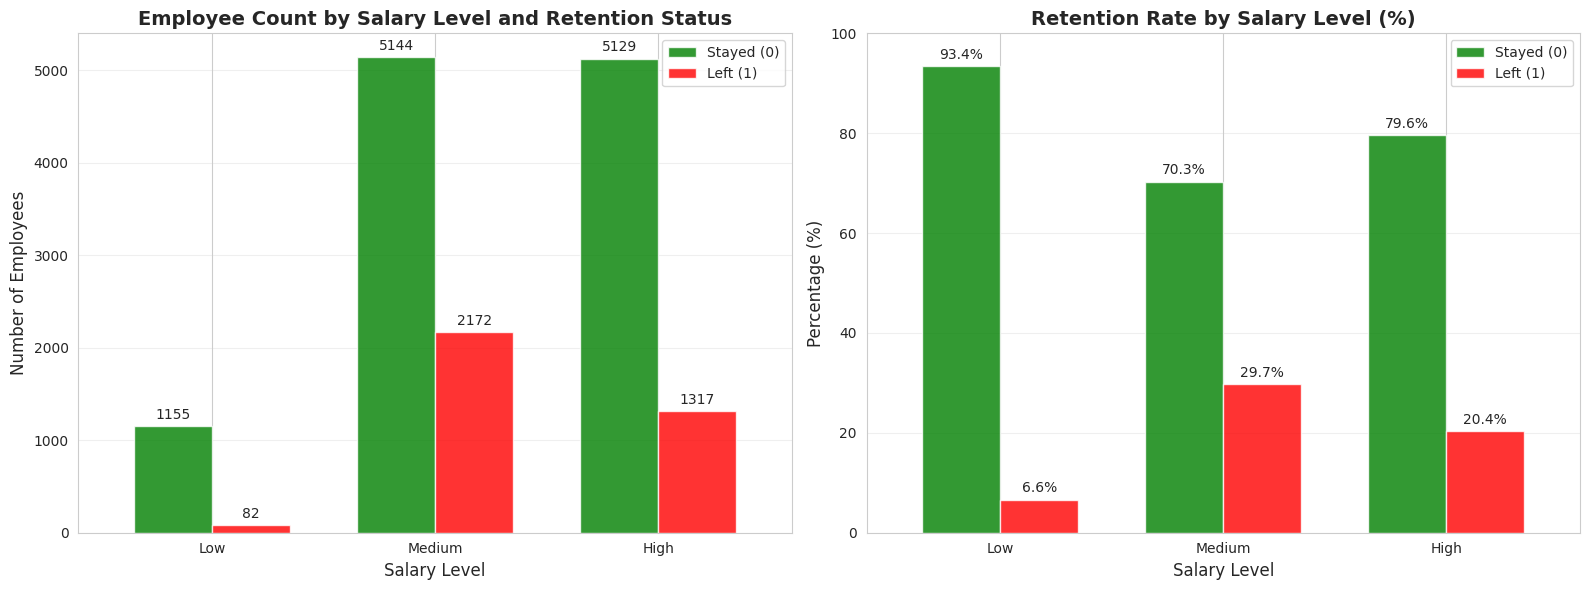

In [28]:
# Bar chart 1: Count of employees by salary and retention status
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Absolute counts
salary_counts = pd.crosstab(df['salary'], df['left'])
salary_counts.plot(kind='bar', ax=axes[0], color=['green', 'red'], alpha=0.8, width=0.7)
axes[0].set_title('Employee Count by Salary Level and Retention Status', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Salary Level', fontsize=12)
axes[0].set_ylabel('Number of Employees', fontsize=12)
axes[0].legend(['Stayed (0)', 'Left (1)'], loc='upper right')
axes[0].set_xticklabels(['Low', 'Medium', 'High'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', padding=3)

# Percentage distribution
salary_retention_plot = pd.crosstab(df['salary'], df['left'], normalize='index') * 100
salary_retention_plot.plot(kind='bar', ax=axes[1], color=['green', 'red'], alpha=0.8, width=0.7)
axes[1].set_title('Retention Rate by Salary Level (%)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Salary Level', fontsize=12)
axes[1].set_ylabel('Percentage (%)', fontsize=12)
axes[1].legend(['Stayed (0)', 'Left (1)'], loc='upper right')
axes[1].set_xticklabels(['Low', 'Medium', 'High'], rotation=0)
axes[1].set_ylim([0, 100])
axes[1].grid(axis='y', alpha=0.3)

# Add percentage labels on bars
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.1f%%', padding=3)

plt.tight_layout()
plt.show()

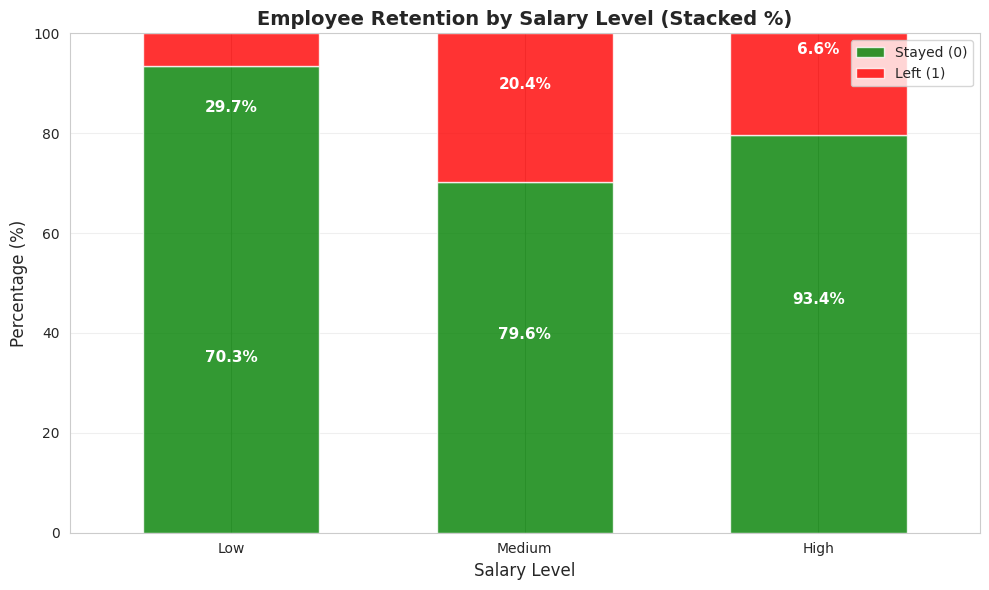


Key Insight:
Employees with LOW salary have the highest attrition rate.
Employees with HIGH salary have the lowest attrition rate.


In [32]:
# Additional visualization: Stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

salary_counts_pct = pd.crosstab(df['salary'], df['left'], normalize='index') * 100
salary_counts_pct.plot(kind='bar', stacked=True, ax=ax, color=['green', 'red'], alpha=0.8, width=0.6)

ax.set_title('Employee Retention by Salary Level (Stacked %)', fontsize=14, fontweight='bold')
ax.set_xlabel('Salary Level', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.legend(['Stayed (0)', 'Left (1)'], loc='upper right')
ax.set_xticklabels(['Low', 'Medium', 'High'], rotation=0)
ax.set_ylim([0, 100])
ax.grid(axis='y', alpha=0.3)

# Add percentage labels
for i, salary_level in enumerate(['low', 'medium', 'high']):
    stayed_pct = salary_counts_pct.loc[salary_level, 0]
    left_pct = salary_counts_pct.loc[salary_level, 1]
    ax.text(i, stayed_pct/2, f'{stayed_pct:.1f}%', ha='center', va='center',
            fontweight='bold', color='white', fontsize=11)
    ax.text(i, stayed_pct + left_pct/2, f'{left_pct:.1f}%', ha='center', va='center',
            fontweight='bold', color='white', fontsize=11)

plt.tight_layout()
plt.show()

print("\nKey Insight:")
print("Employees with LOW salary have the highest attrition rate.")
print("Employees with HIGH salary have the lowest attrition rate.")

TASK 3: Correlation Between Department and Employee Retention

In [33]:
# Department distribution analysis
print("Department Distribution:")
print(df['Department'].value_counts())

# Create department vs retention crosstab
dept_retention = pd.crosstab(df['Department'], df['left'], normalize='index') * 100
print("\nRetention Rate by Department (%)")
print(dept_retention.sort_values(by=1, ascending=False))

Department Distribution:
Department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

Retention Rate by Department (%)
left                 0          1
Department                       
hr           70.906631  29.093369
accounting   73.402868  26.597132
technical    74.375000  25.625000
support      75.100942  24.899058
sales        75.507246  24.492754
marketing    76.340326  23.659674
IT           77.750611  22.249389
product_mng  78.048780  21.951220
RandD        84.625159  15.374841
management   85.555556  14.444444


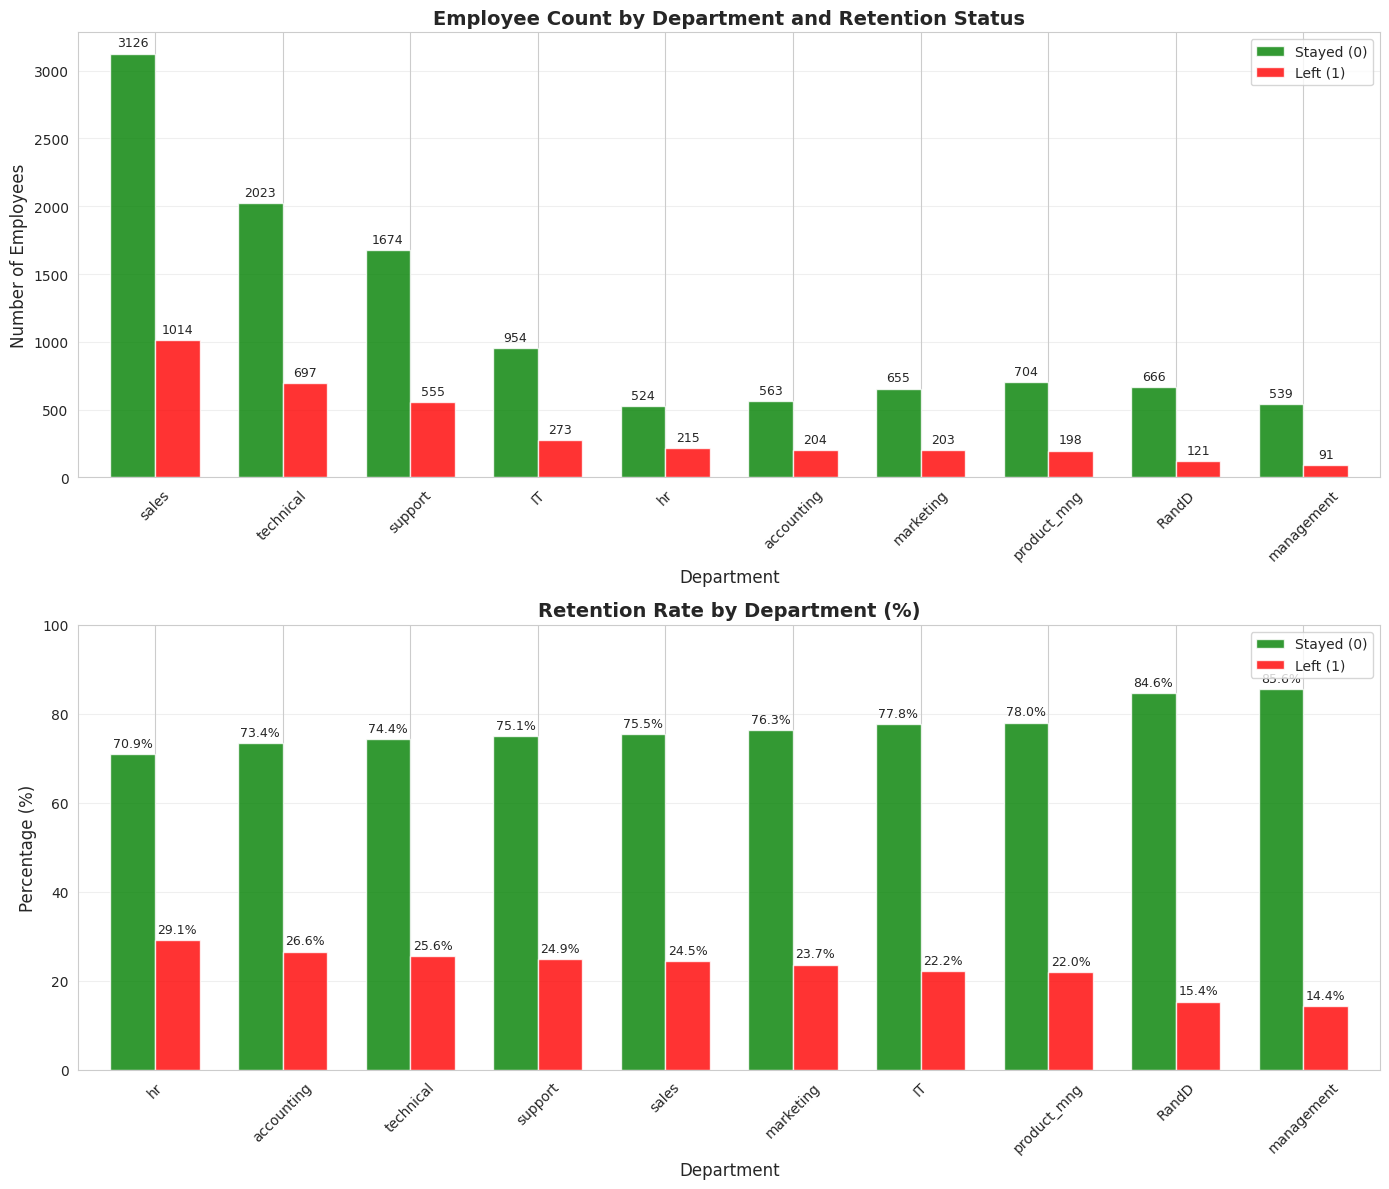

In [34]:
# Bar chart 1: Count of employees by department and retention status
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Absolute counts
dept_counts = pd.crosstab(df['Department'], df['left'])
dept_counts_sorted = dept_counts.sort_values(by=1, ascending=False)

dept_counts_sorted.plot(kind='bar', ax=axes[0], color=['green', 'red'], alpha=0.8, width=0.7)
axes[0].set_title('Employee Count by Department and Retention Status', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Department', fontsize=12)
axes[0].set_ylabel('Number of Employees', fontsize=12)
axes[0].legend(['Stayed (0)', 'Left (1)'], loc='upper right')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', padding=3, fontsize=9)

# Percentage distribution
dept_retention_plot = pd.crosstab(df['Department'], df['left'], normalize='index') * 100
dept_retention_sorted = dept_retention_plot.sort_values(by=1, ascending=False)

dept_retention_sorted.plot(kind='bar', ax=axes[1], color=['green', 'red'], alpha=0.8, width=0.7)
axes[1].set_title('Retention Rate by Department (%)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Department', fontsize=12)
axes[1].set_ylabel('Percentage (%)', fontsize=12)
axes[1].legend(['Stayed (0)', 'Left (1)'], loc='upper right')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim([0, 100])
axes[1].grid(axis='y', alpha=0.3)

# Add percentage labels on bars
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.1f%%', padding=3, fontsize=9)

plt.tight_layout()
plt.show()

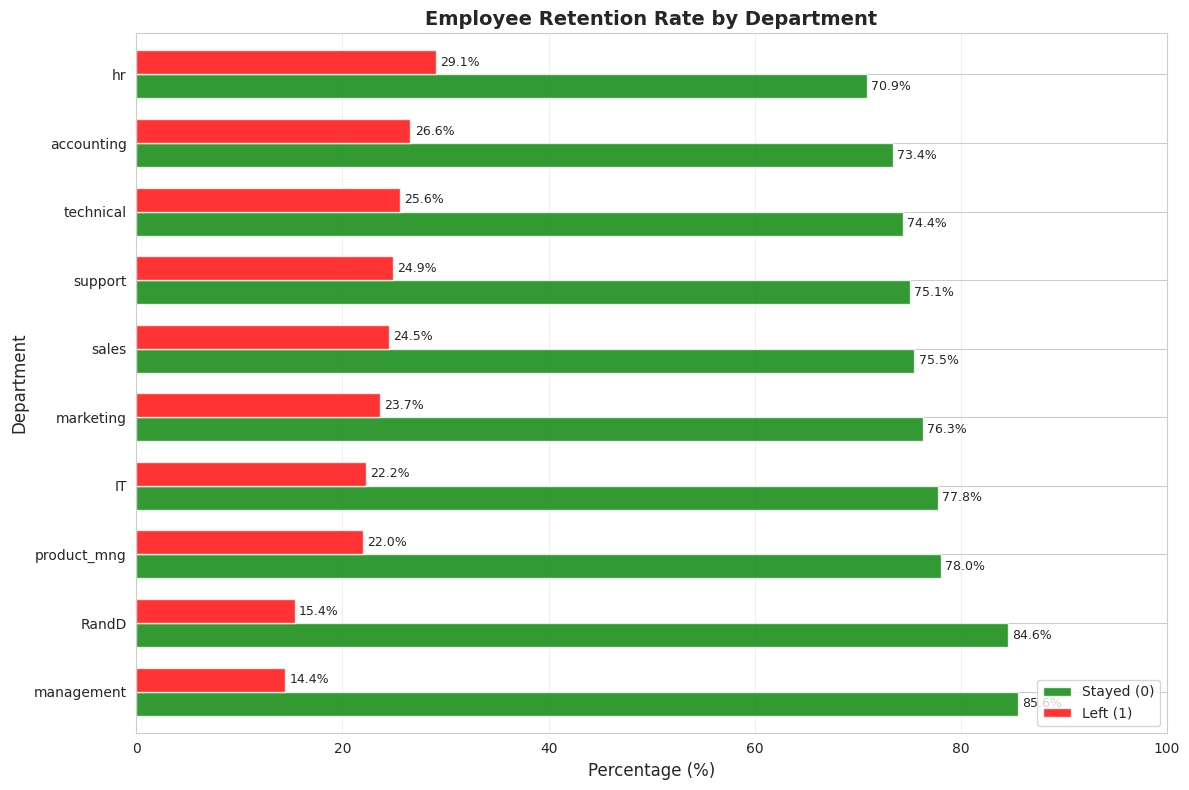


Key Insights:
Department with HIGHEST attrition: hr
Department with LOWEST attrition: management


In [35]:
# Horizontal bar chart for better readability
fig, ax = plt.subplots(figsize=(12, 8))

dept_retention_sorted = pd.crosstab(df['Department'], df['left'], normalize='index') * 100
dept_retention_sorted = dept_retention_sorted.sort_values(by=1, ascending=True)

dept_retention_sorted.plot(kind='barh', ax=ax, color=['green', 'red'], alpha=0.8, width=0.7)

ax.set_title('Employee Retention Rate by Department', fontsize=14, fontweight='bold')
ax.set_xlabel('Percentage (%)', fontsize=12)
ax.set_ylabel('Department', fontsize=12)
ax.legend(['Stayed (0)', 'Left (1)'], loc='lower right')
ax.set_xlim([0, 100])
ax.grid(axis='x', alpha=0.3)

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3, fontsize=9)

plt.tight_layout()
plt.show()

print("\nKey Insights:")
print(f"Department with HIGHEST attrition: {dept_retention_sorted.idxmax()[1]}")
print(f"Department with LOWEST attrition: {dept_retention_sorted.idxmin()[1]}")

TASK 4: Build Logistic Regressions Model

Using Variable Identified in task 1

In [36]:
# Prepare the data for modeling
print("Preparing data for Logistic Regression...\n")

# Create a copy of the dataframe
df_model = df.copy()

# Encode categorical variables
label_encoder_dept = LabelEncoder()
label_encoder_salary = LabelEncoder()

df_model['Department_encoded'] = label_encoder_dept.fit_transform(df_model['Department'])
df_model['salary_encoded'] = label_encoder_salary.fit_transform(df_model['salary'])

print("Encoding Mappings:")
print("\nDepartment:")
for i, dept in enumerate(label_encoder_dept.classes_):
    print(f"  {dept}: {i}")

print("\nSalary:")
for i, sal in enumerate(label_encoder_salary.classes_):
    print(f"  {sal}: {i}")

Preparing data for Logistic Regression...

Encoding Mappings:

Department:
  IT: 0
  RandD: 1
  accounting: 2
  hr: 3
  management: 4
  marketing: 5
  product_mng: 6
  sales: 7
  support: 8
  technical: 9

Salary:
  high: 0
  low: 1
  medium: 2


In [38]:
# Define features (X) and target (y)
X = df_model.drop(['left', 'Department', 'salary'], axis=1) # Drop original categorical columns and target
y = df_model['left']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"\nTraining set class distribution:")
print(y_train.value_counts())
print(f"\nTesting set class distribution:")
print(y_test.value_counts())

Training set size: 11999 samples
Testing set size: 3000 samples

Training set class distribution:
left
0    9142
1    2857
Name: count, dtype: int64

Testing set class distribution:
left
0    2286
1     714
Name: count, dtype: int64


In [40]:
# Build and train the Logistic Regression model
print("Training Logistic Regression Model...\n")

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

print("Model training completed!")
print("\nModel Coefficients:")
print("="*60)

# Get feature names from the training data's columns
feature_columns = X_train.columns

# Display feature importance (coefficients)
coefficients = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(coefficients.to_string(index=False))

Training Logistic Regression Model...

Model training completed!

Model Coefficients:
              Feature  Coefficient
      last_evaluation     0.757726
   time_spend_company     0.232261
   Department_encoded     0.036613
       salary_encoded     0.010996
 average_montly_hours     0.004423
       number_project    -0.311592
promotion_last_5years    -1.450551
        Work_accident    -1.471506
   satisfaction_level    -4.051899


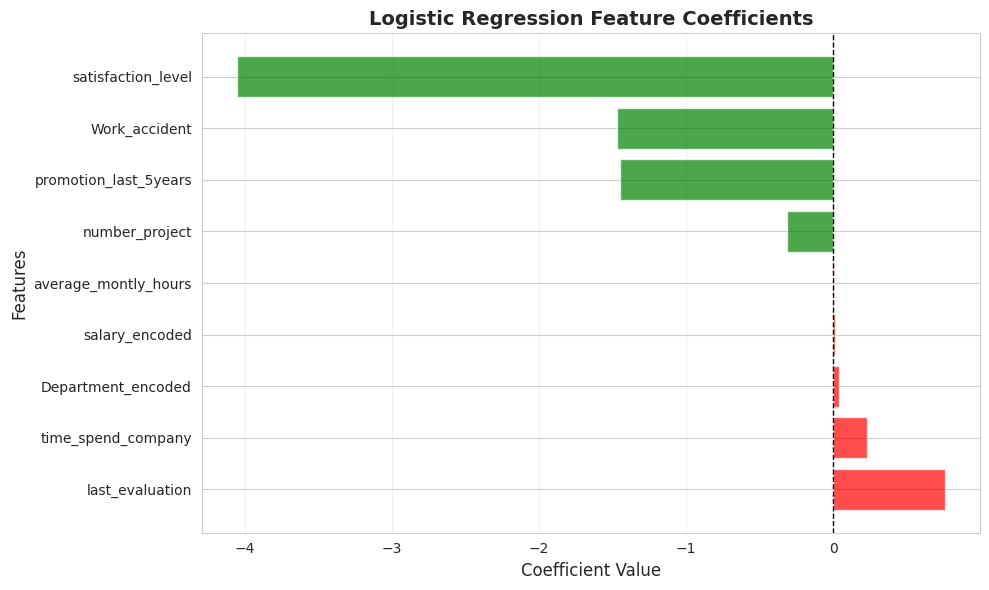


Note: Negative coefficients decrease the likelihood of leaving.
      Positive coefficients increase the likelihood of leaving.


In [41]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
colors = ['green' if x < 0 else 'red' for x in coefficients['Coefficient']]
plt.barh(coefficients['Feature'], coefficients['Coefficient'], color=colors, alpha=0.7)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Logistic Regression Feature Coefficients', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nNote: Negative coefficients decrease the likelihood of leaving.")
print("      Positive coefficients increase the likelihood of leaving.")

TASK 5: Measure Model Accuracy

In [42]:
# Make predictions
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("MODEL PERFORMANCE METRICS")
print("="*60)
print(f"\nTraining Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Testing Accuracy:  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"\nOverfitting Check: {abs(train_accuracy - test_accuracy):.4f}")
if abs(train_accuracy - test_accuracy) < 0.02:
    print("✓ Model is well-generalized (no significant overfitting)")
else:
    print("⚠ Model may be overfitting")

MODEL PERFORMANCE METRICS

Training Accuracy: 0.7660 (76.60%)
Testing Accuracy:  0.7717 (77.17%)

Overfitting Check: 0.0057
✓ Model is well-generalized (no significant overfitting)


In [43]:
# Detailed classification report
print("\nDETAILED CLASSIFICATION REPORT (Test Set)")
print("="*60)
print(classification_report(y_test, y_test_pred,
                          target_names=['Stayed (0)', 'Left (1)']))


DETAILED CLASSIFICATION REPORT (Test Set)
              precision    recall  f1-score   support

  Stayed (0)       0.80      0.93      0.86      2286
    Left (1)       0.54      0.26      0.35       714

    accuracy                           0.77      3000
   macro avg       0.67      0.60      0.61      3000
weighted avg       0.74      0.77      0.74      3000



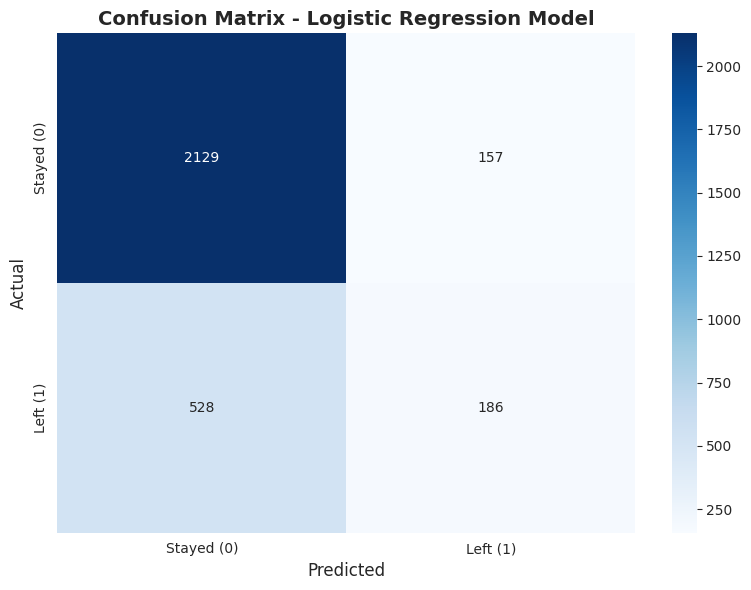


Confusion Matrix Interpretation:
True Negatives (Correctly predicted Stayed):  2129
False Positives (Incorrectly predicted Left): 157
False Negatives (Incorrectly predicted Stayed): 528
True Positives (Correctly predicted Left):    186


In [44]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Stayed (0)', 'Left (1)'],
            yticklabels=['Stayed (0)', 'Left (1)'])
plt.title('Confusion Matrix - Logistic Regression Model', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

print("\nConfusion Matrix Interpretation:")
print(f"True Negatives (Correctly predicted Stayed):  {cm[0, 0]}")
print(f"False Positives (Incorrectly predicted Left): {cm[0, 1]}")
print(f"False Negatives (Incorrectly predicted Stayed): {cm[1, 0]}")
print(f"True Positives (Correctly predicted Left):    {cm[1, 1]}")


ADDITIONAL PERFORMANCE METRICS
Precision (for 'Left' class): 0.5423
Recall (for 'Left' class):    0.2605
F1-Score (for 'Left' class):  0.3519


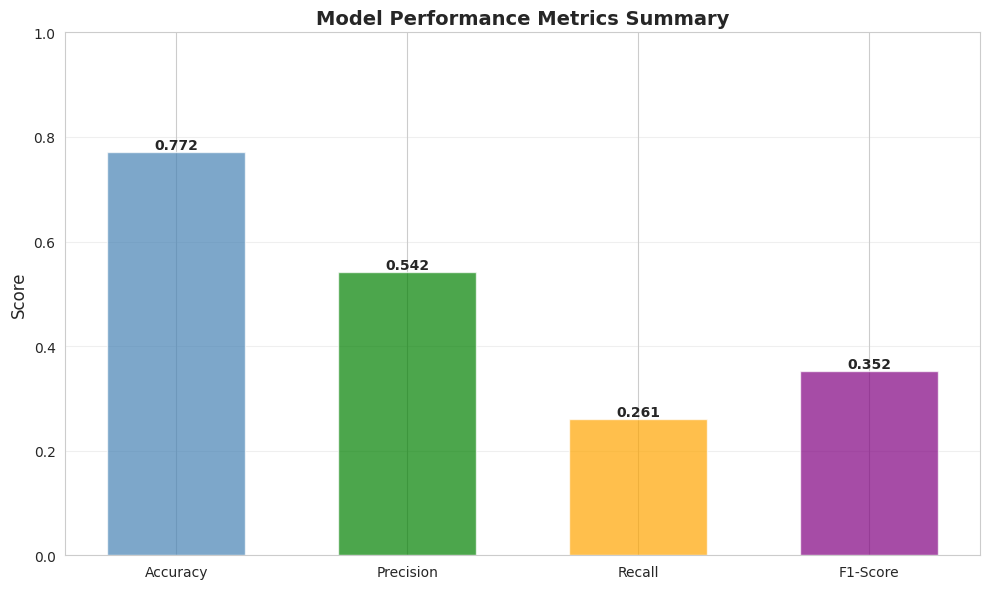

In [45]:
# Additional metrics
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("\nADDITIONAL PERFORMANCE METRICS")
print("="*60)
print(f"Precision (for 'Left' class): {precision:.4f}")
print(f"Recall (for 'Left' class):    {recall:.4f}")
print(f"F1-Score (for 'Left' class):  {f1:.4f}")

# Visualize metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [test_accuracy, precision, recall, f1]
})

plt.figure(figsize=(10, 6))
bars = plt.bar(metrics_df['Metric'], metrics_df['Score'],
               color=['steelblue', 'green', 'orange', 'purple'], alpha=0.7, width=0.6)
plt.ylim([0, 1])
plt.ylabel('Score', fontsize=12)
plt.title('Model Performance Metrics Summary', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

SUMMARY AND CONCLUSION

In [46]:
print("\n" + "="*80)
print("EMPLOYEE RETENTION ANALYSIS - SUMMARY")
print("="*80)

print("\n1. KEY FINDINGS FROM EDA:")
print("   - Satisfaction level is the strongest predictor (negative correlation)")
print("   - Number of projects shows clear patterns (2 or 7 projects = higher attrition)")
print("   - Average monthly hours impacts retention (overworked employees leave)")
print("   - Time at company shows tenure-based attrition patterns")

print("\n2. SALARY IMPACT:")
print(f"   - Low salary employees have the HIGHEST attrition rate")
print(f"   - High salary employees have the LOWEST attrition rate")
print(f"   - Clear inverse relationship between salary and attrition")

print("\n3. DEPARTMENT IMPACT:")
dept_retention_final = pd.crosstab(df['Department'], df['left'], normalize='index') * 100
highest_attrition_dept = dept_retention_final[1].idxmax()
lowest_attrition_dept = dept_retention_final[1].idxmin()
print(f"   - Highest attrition: {highest_attrition_dept} ({dept_retention_final.loc[highest_attrition_dept, 1]:.1f}%)")
print(f"   - Lowest attrition: {lowest_attrition_dept} ({dept_retention_final.loc[lowest_attrition_dept, 1]:.1f}%)")

print("\n4. MODEL PERFORMANCE:")
print(f"   - Accuracy: {test_accuracy*100:.2f}%")
print(f"   - Precision: {precision*100:.2f}%")
print(f"   - Recall: {recall*100:.2f}%")
print(f"   - F1-Score: {f1*100:.2f}%")

print("\n5. BUSINESS RECOMMENDATIONS:")
print("   - Focus on improving employee satisfaction (strongest predictor)")
print("   - Review salary structures, especially for low-salary employees")
print("   - Balance project assignments (avoid overloading or underutilizing)")
print("   - Monitor working hours to prevent burnout")
print(f"   - Investigate retention issues in {highest_attrition_dept} department")

print("\n" + "="*80)


EMPLOYEE RETENTION ANALYSIS - SUMMARY

1. KEY FINDINGS FROM EDA:
   - Satisfaction level is the strongest predictor (negative correlation)
   - Number of projects shows clear patterns (2 or 7 projects = higher attrition)
   - Average monthly hours impacts retention (overworked employees leave)
   - Time at company shows tenure-based attrition patterns

2. SALARY IMPACT:
   - Low salary employees have the HIGHEST attrition rate
   - High salary employees have the LOWEST attrition rate
   - Clear inverse relationship between salary and attrition

3. DEPARTMENT IMPACT:
   - Highest attrition: hr (29.1%)
   - Lowest attrition: management (14.4%)

4. MODEL PERFORMANCE:
   - Accuracy: 77.17%
   - Precision: 54.23%
   - Recall: 26.05%
   - F1-Score: 35.19%

5. BUSINESS RECOMMENDATIONS:
   - Focus on improving employee satisfaction (strongest predictor)
   - Review salary structures, especially for low-salary employees
   - Balance project assignments (avoid overloading or underutilizing)
   